In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
figsize = (12, 5)
dpi = 600  

In [9]:
data = {'dist':  [5,5.8,6.9,7.8,8.9,9.7,10.9,11.8,12.8,13.7,14.6,15.6,16.8,17.7,18.5,19.7,20.9,21.8,23,23.7,24.8,25.7,26.6,27.5,28.6,29.5,30,35,40,45,50,55,60,65,70,75,80],
        'P': [0.39,1,0.345,1,0.32,1,0.29,0.81,0.3,0.635,0.255,0.4,0.22,0.345,0.19,0.29,0.145,0.23,0.145,0.205,0.105,0.165,0.095,0.145,0.085,0.125,0.095,0.06,0.045,0.055,0.0325,0.035,0.02,0.03,0.02,0.02,0.019]
        }

df = pd.DataFrame(data)
df

,dist,P
0,5.0,0.3900
1,5.8,1.0000
2,6.9,0.3450
3,7.8,1.0000
4,8.9,0.3200
5,9.7,1.0000
6,10.9,0.2900
7,11.8,0.8100
8,12.8,0.3000
9,13.7,0.6350


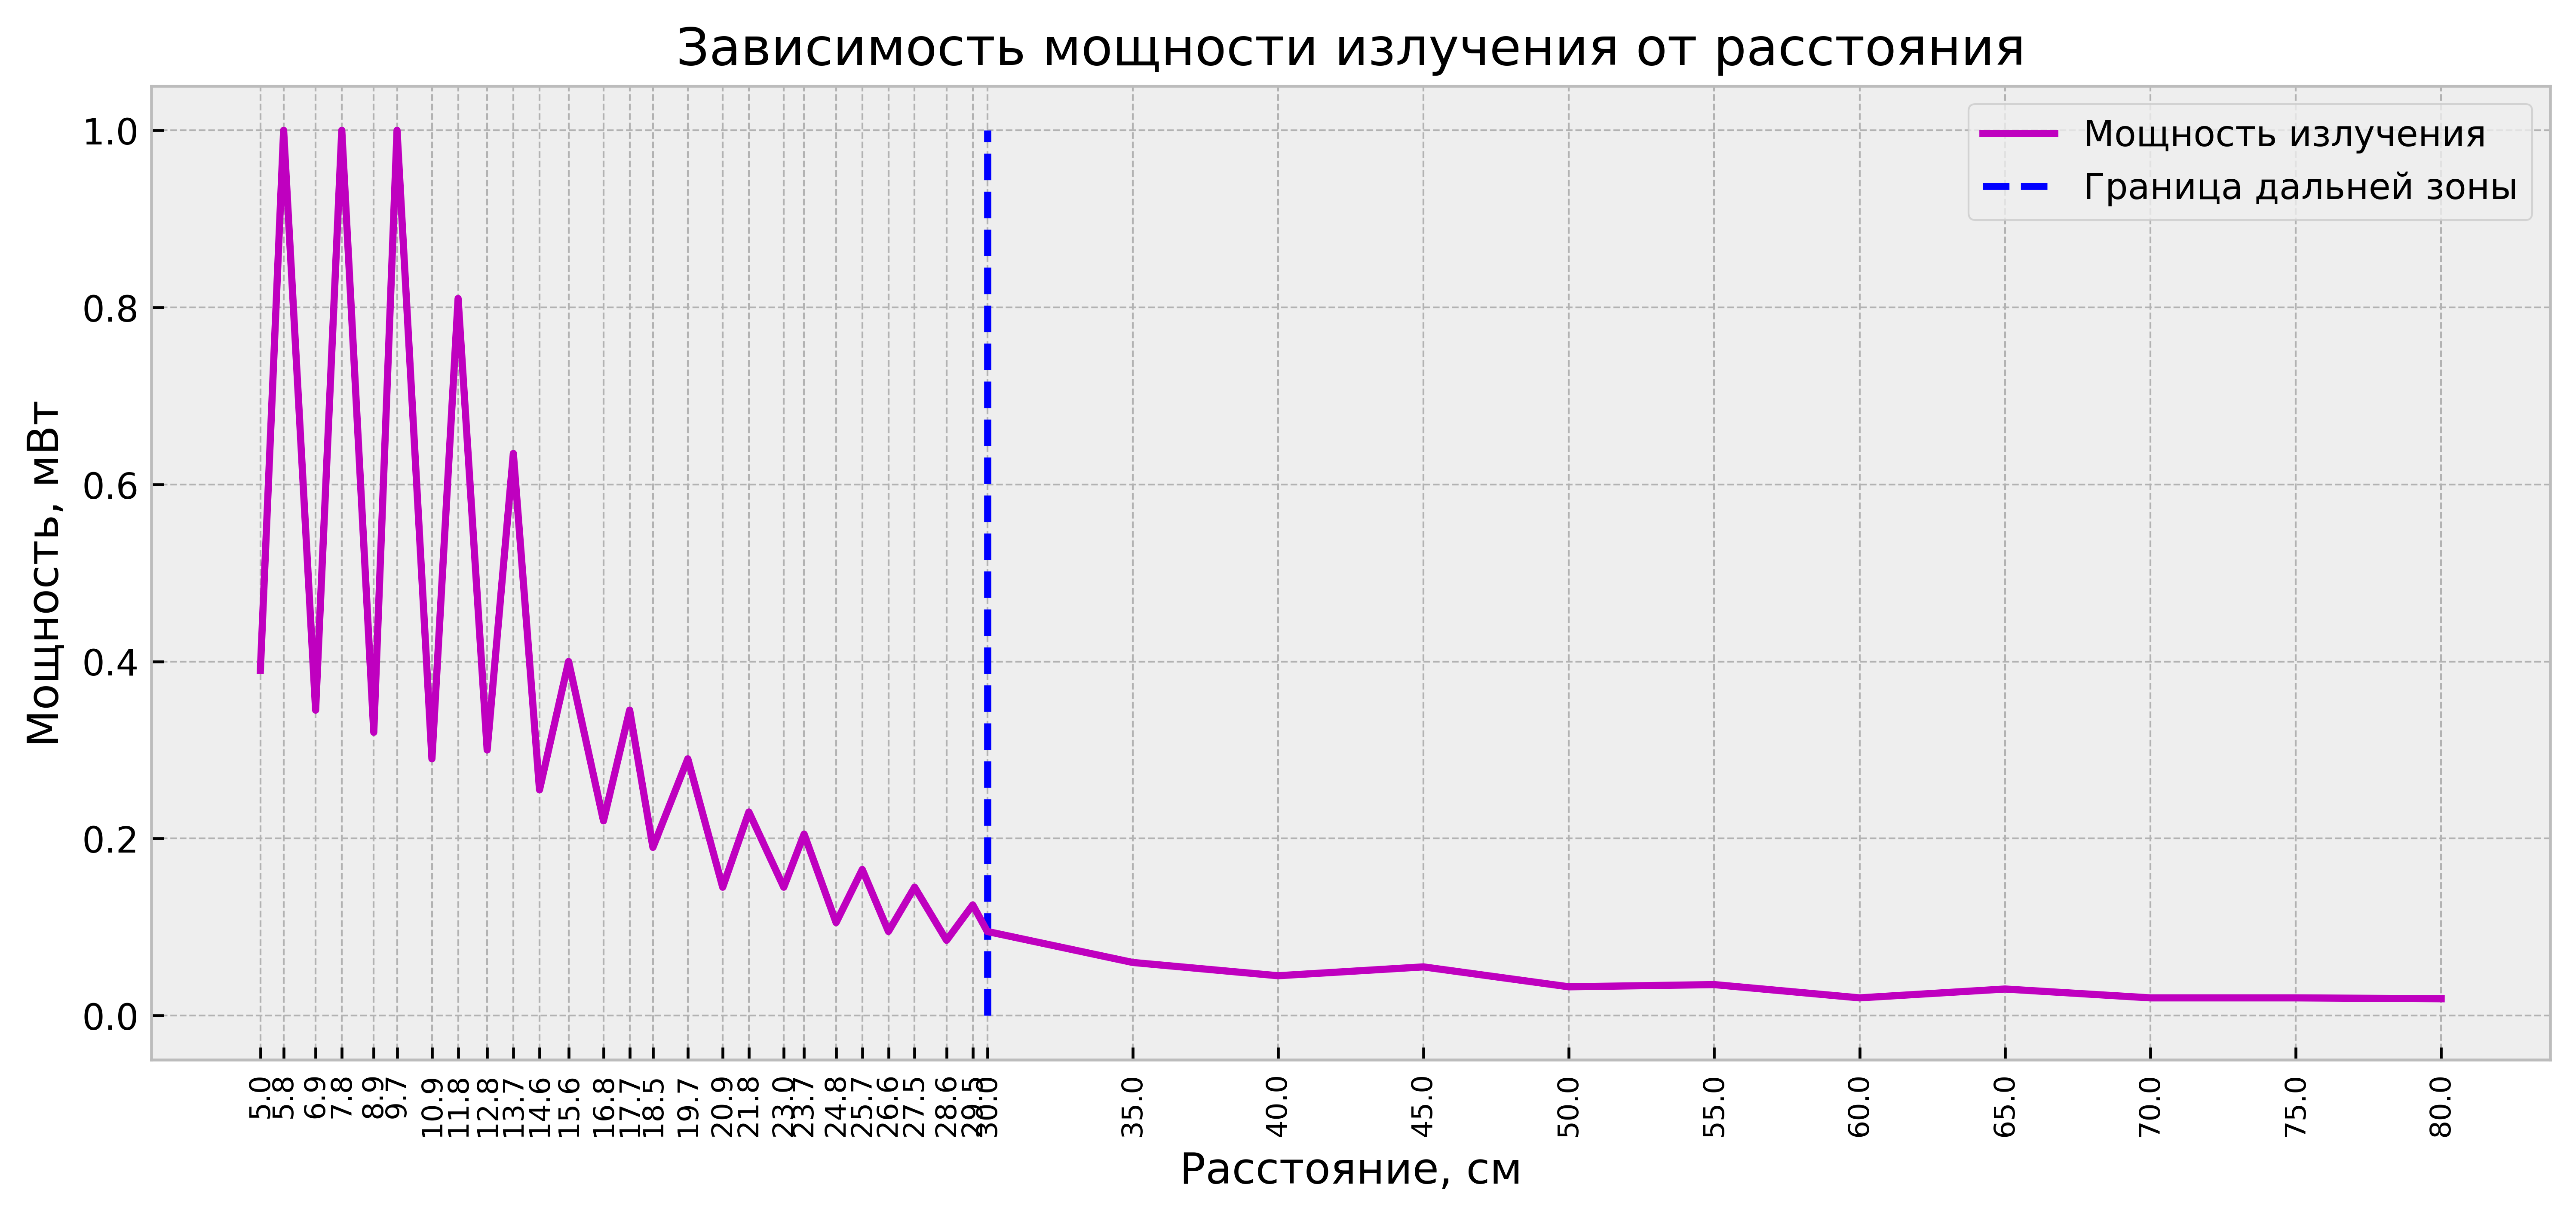

In [10]:
plt.figure(dpi=dpi, figsize=figsize)
x, y = df['dist'], df['P']
plt.plot(x, y, label='Мощность излучения', c='m')
plt.xticks(x, rotation='vertical', fontsize=8)
plt.xlabel('Расстояние, см')
plt.ylabel('Мощность, мВт')
plt.title('Зависимость мощности излучения от расстояния')
plt.vlines(30, 0, 1, linestyle='--', color='b', label='Граница дальней зоны')
plt.legend()
plt.show()

In [4]:
filter_large = df['dist'] >= 30
df_large = df.loc[filter_large]
Gpr = 55
lmbd = 3
Sef = ((lmbd**2) / (4*np.pi)) * Gpr
PPEe = df_large['P'] / Sef
df_large['PPEe'] = PPEe
df_large

<ipython-input-4-2a32f1edd436>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_large['PPEe'] = PPEe


,dist,P,PPEe
26,30.0,0.0950,0.002412
27,35.0,0.0600,0.001523
28,40.0,0.0450,0.001142
29,45.0,0.0550,0.001396
30,50.0,0.0325,0.000825
31,55.0,0.0350,0.000889
32,60.0,0.0200,0.000508
33,65.0,0.0300,0.000762
34,70.0,0.0200,0.000508
35,75.0,0.0200,0.000508


In [5]:
filter_large = df['dist'] >= 30
df_large = df.loc[filter_large]
Gp = 55
Pg = 4
F = 1
PPEt = ((Pg*Gp)/(4*np.pi*(df_large['dist'])**2))*(F**2)
df_large['PPEt'] = PPEt
df_large

<ipython-input-5-2ef8b5d91ea1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_large['PPEt'] = PPEt


,dist,P,PPEt
26,30.0,0.0950,0.019452
27,35.0,0.0600,0.014291
28,40.0,0.0450,0.010942
29,45.0,0.0550,0.008645
30,50.0,0.0325,0.007003
31,55.0,0.0350,0.005787
32,60.0,0.0200,0.004863
33,65.0,0.0300,0.004144
34,70.0,0.0200,0.003573
35,75.0,0.0200,0.003112


In [6]:
PPEe = np.array(PPEe)
PPEt = np.array(PPEt)
dist = np.array(df_large['dist'])

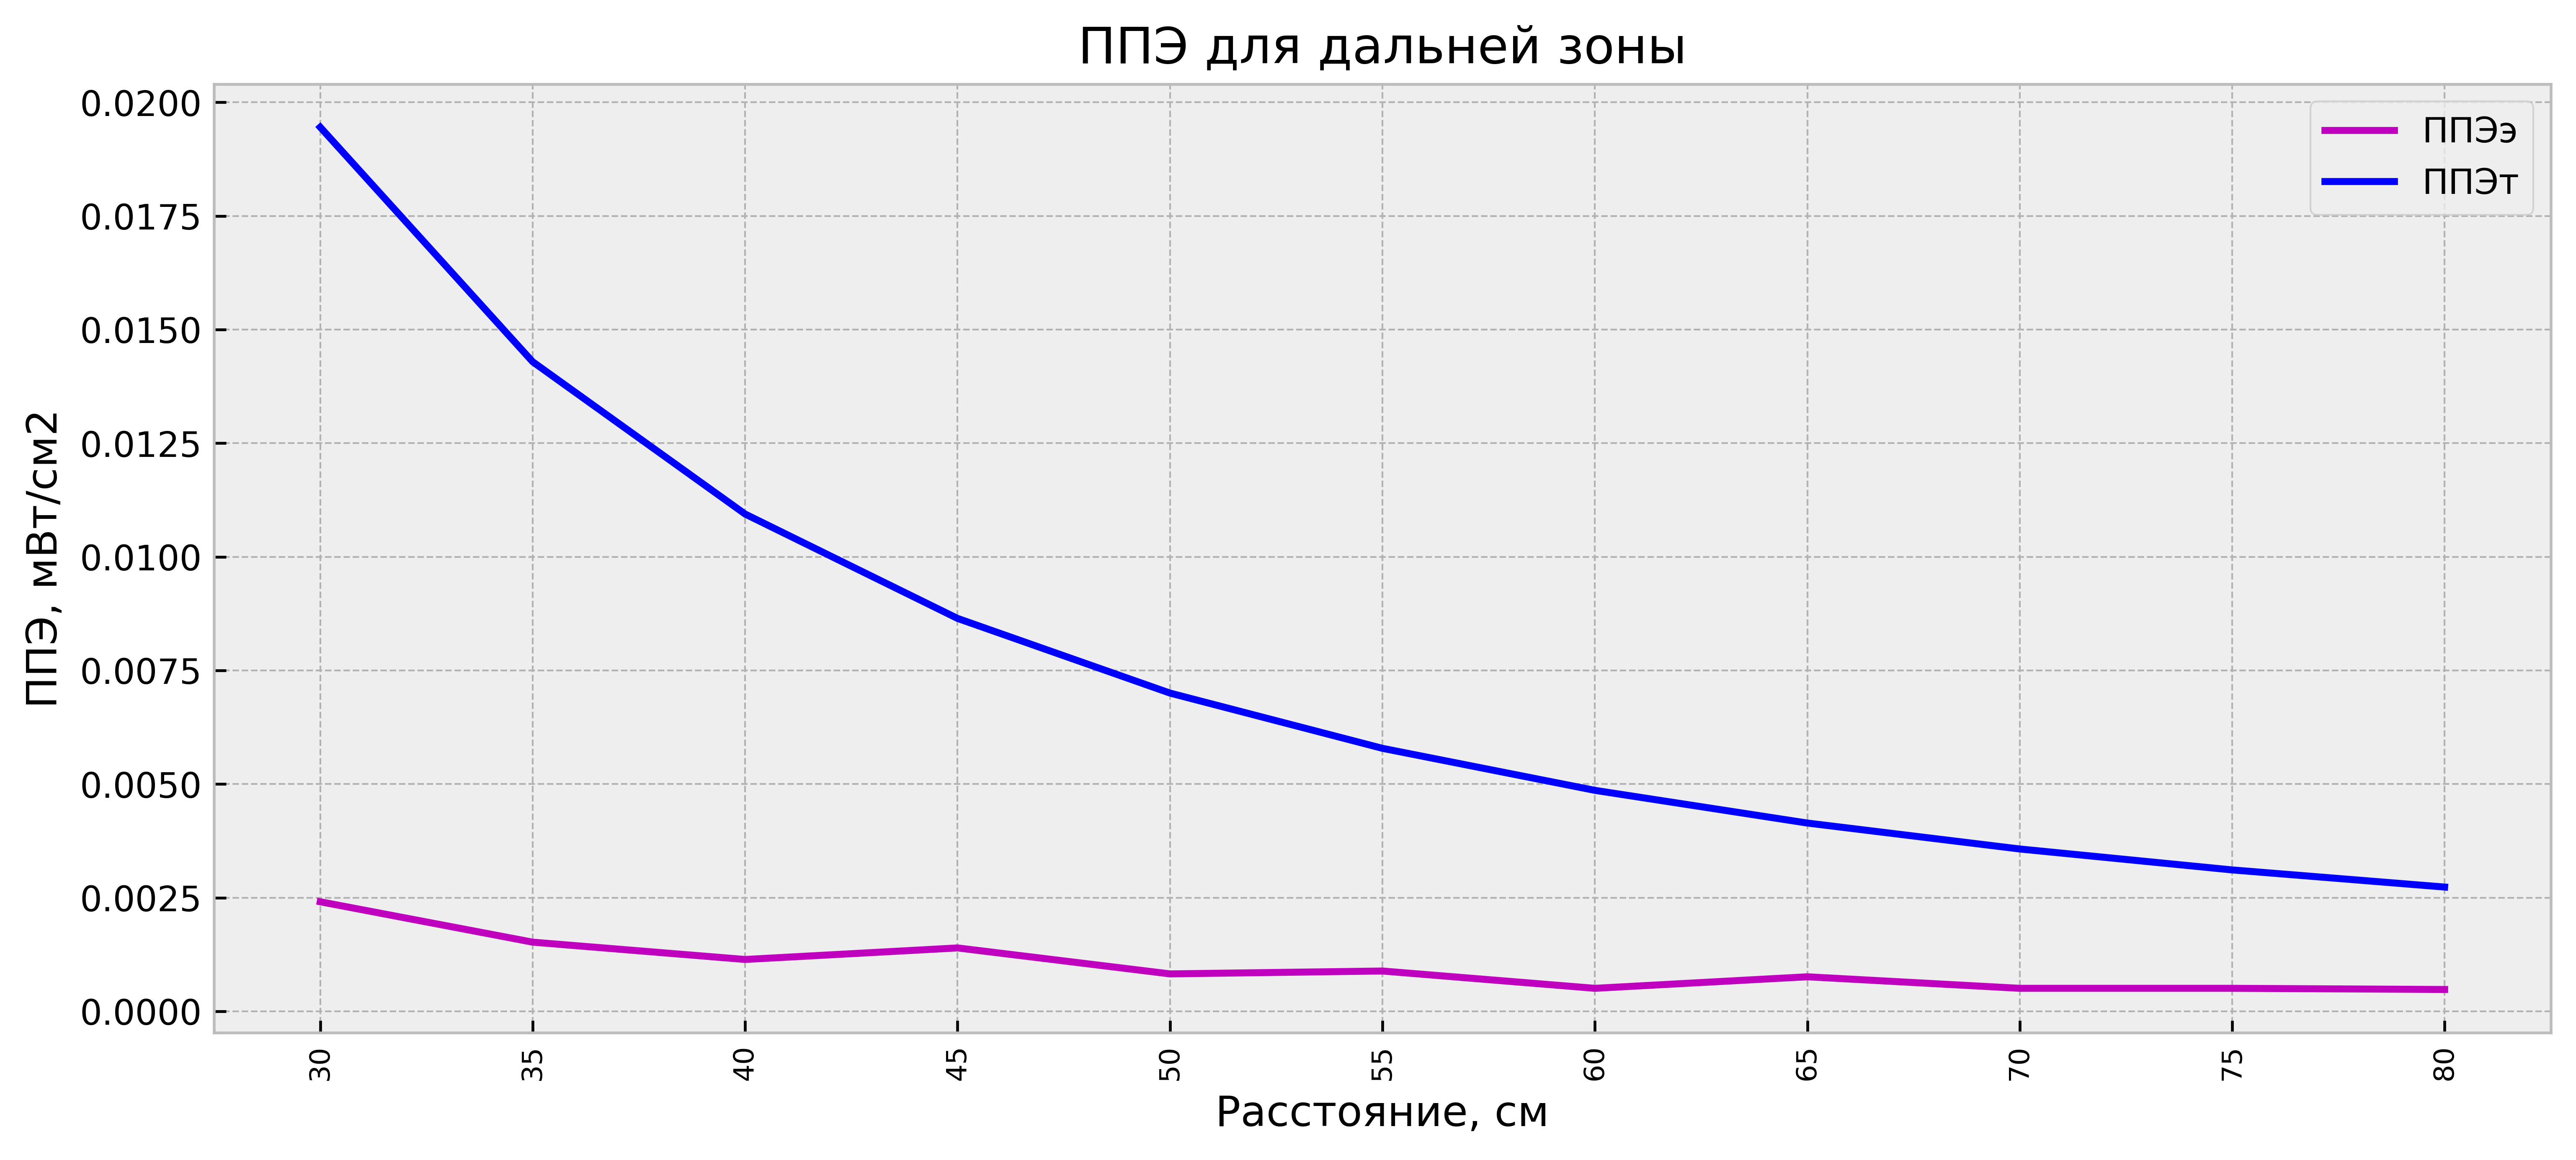

In [7]:
plt.figure(dpi=dpi, figsize=figsize)
plt.plot(dist, PPEe, label='ППЭэ', c='m')
plt.plot(dist, PPEt, label='ППЭт', c='b')
plt.xticks(dist, rotation='vertical', fontsize=8)
plt.xlabel('Расстояние, см')
plt.ylabel('ППЭ, мВт/см2')
plt.title('ППЭ для дальней зоны')
plt.legend()
plt.show()

In [9]:
data2 = {'angle':  [5,10,15,20,25,30,35,40],
        'P': [0.0975,0.08,0.0425,0.0075,0,0,0,0]
        }

df2 = pd.DataFrame(data2)
df2

,angle,P
0,5,0.0975
1,10,0.0800
2,15,0.0425
3,20,0.0075
4,25,0.0000
5,30,0.0000
6,35,0.0000
7,40,0.0000


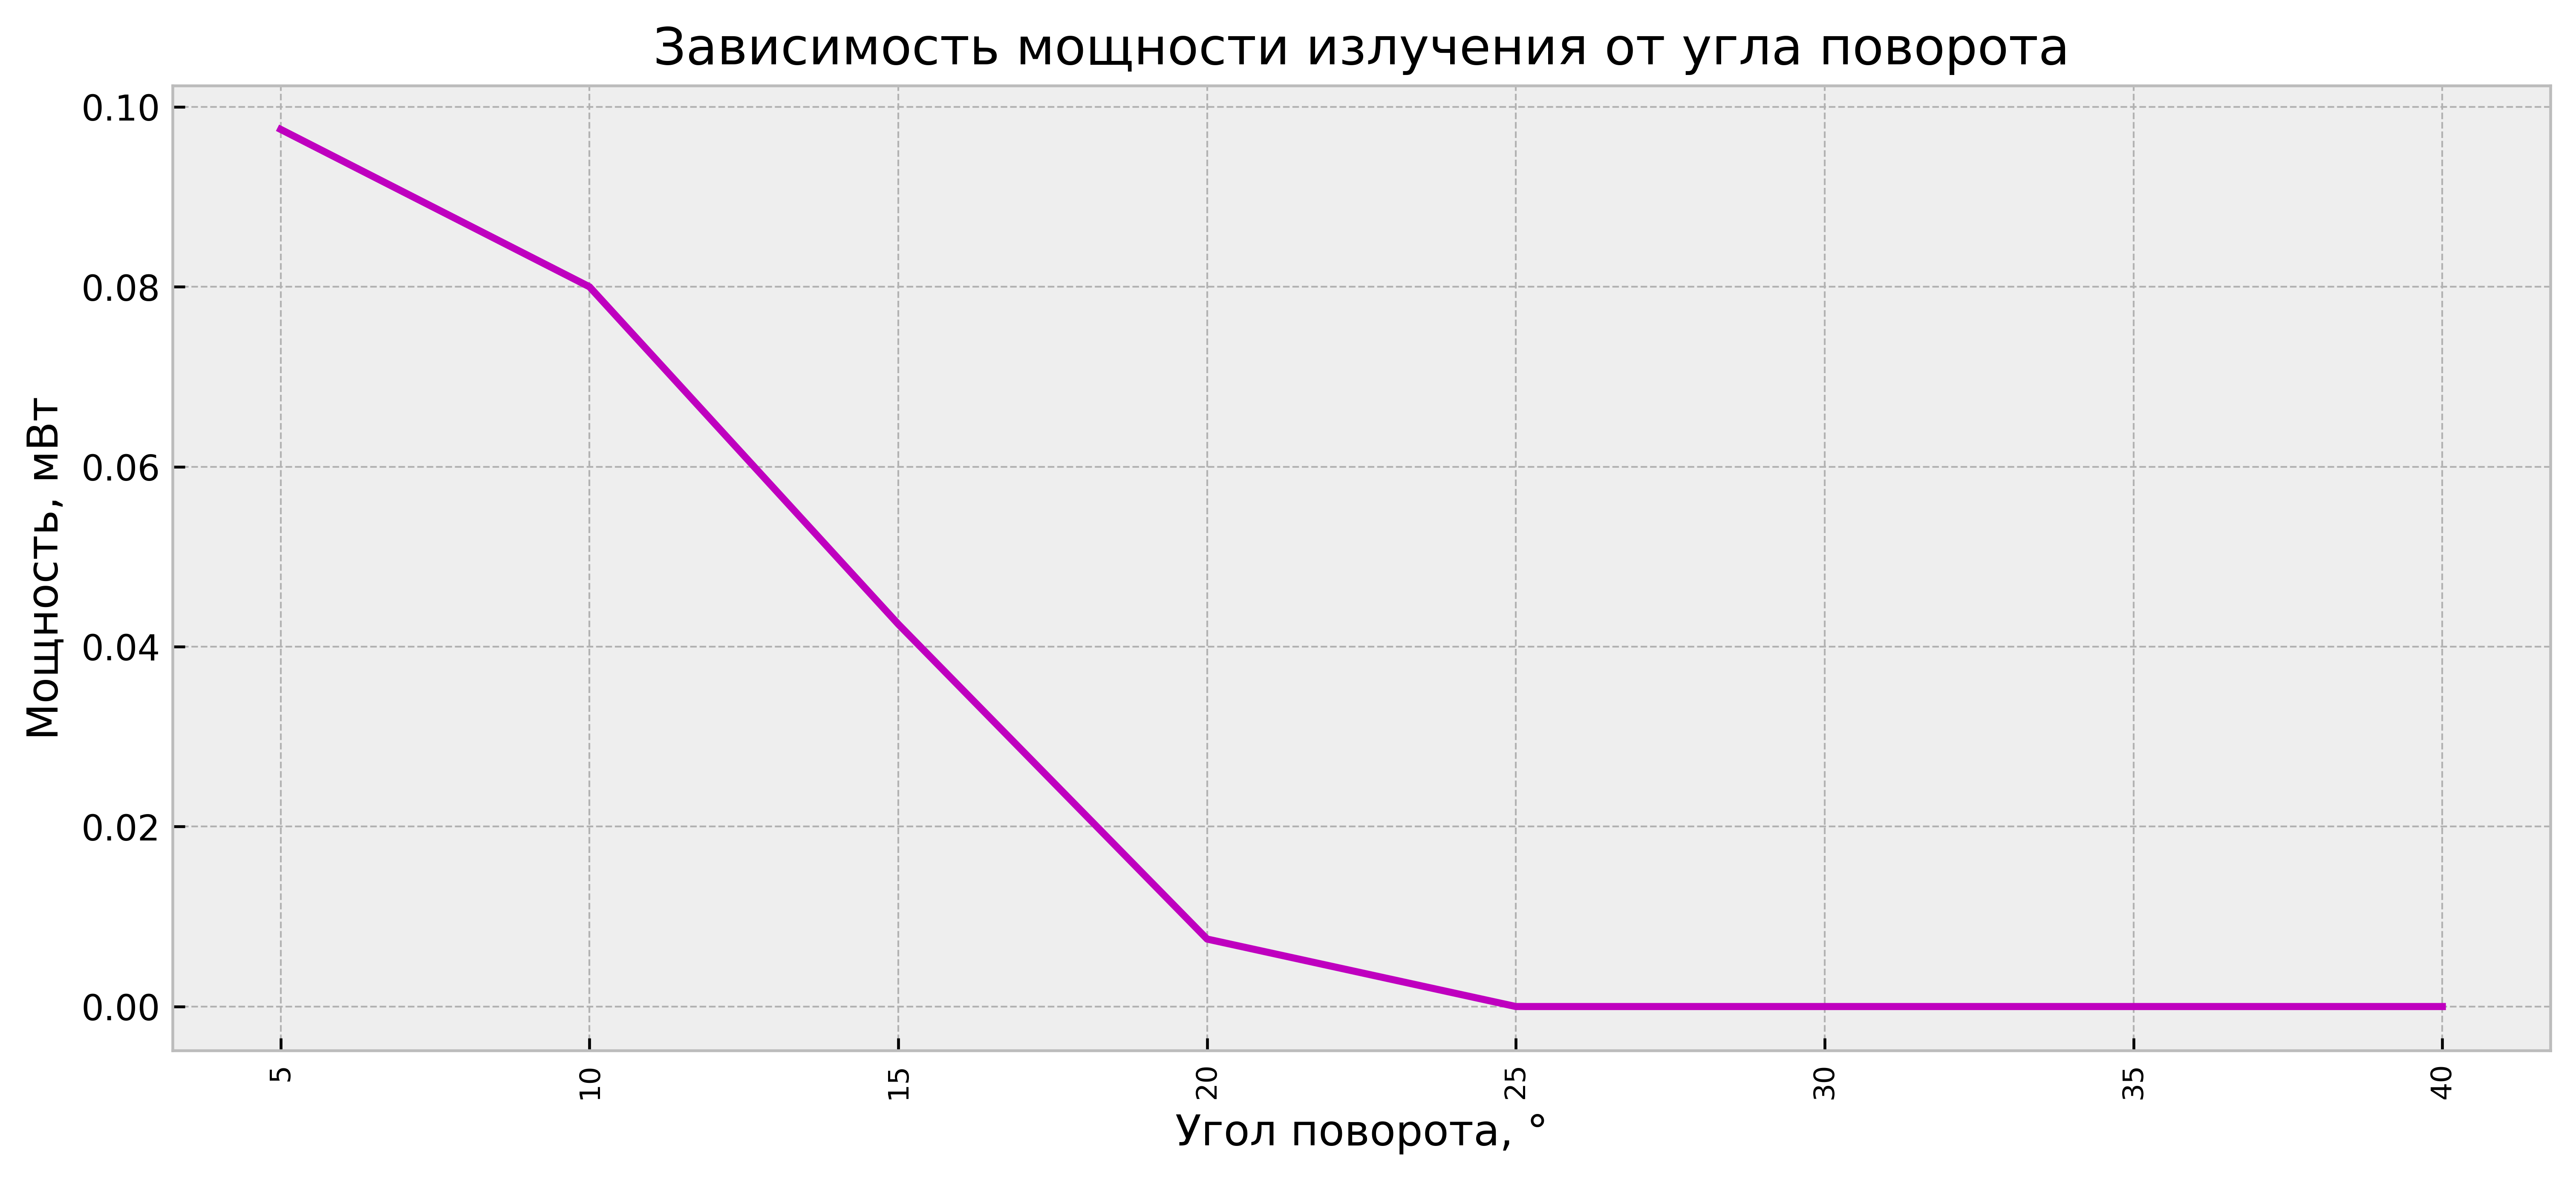

In [25]:
plt.figure(dpi=dpi, figsize=figsize)
x, y = df2['angle'], df2['P']
plt.plot(x, y, label='Мощность излучения', c='m')
plt.xticks(x, rotation='vertical', fontsize=8)
plt.xlabel('Угол поворота, °')
plt.ylabel('Мощность, мВт')
plt.title('Зависимость мощности излучения от угла поворота')
plt.show()

# Поясняю

если нужно без значения в нуле запускаешь [Без нуля](#Без-нуля) и потом [без нуля](#без-нуля)

без нуля соед: [Без нуля (соед)](#Без-нуля-(соед)) и потом [ноль](#ноль)

с нулем (фикт): [С нулем (фикт значение (0, 0.1))](#С-нулем-(фикт-значение-(0,-0.1))) и потом [ноль](#ноль)


### Без нуля

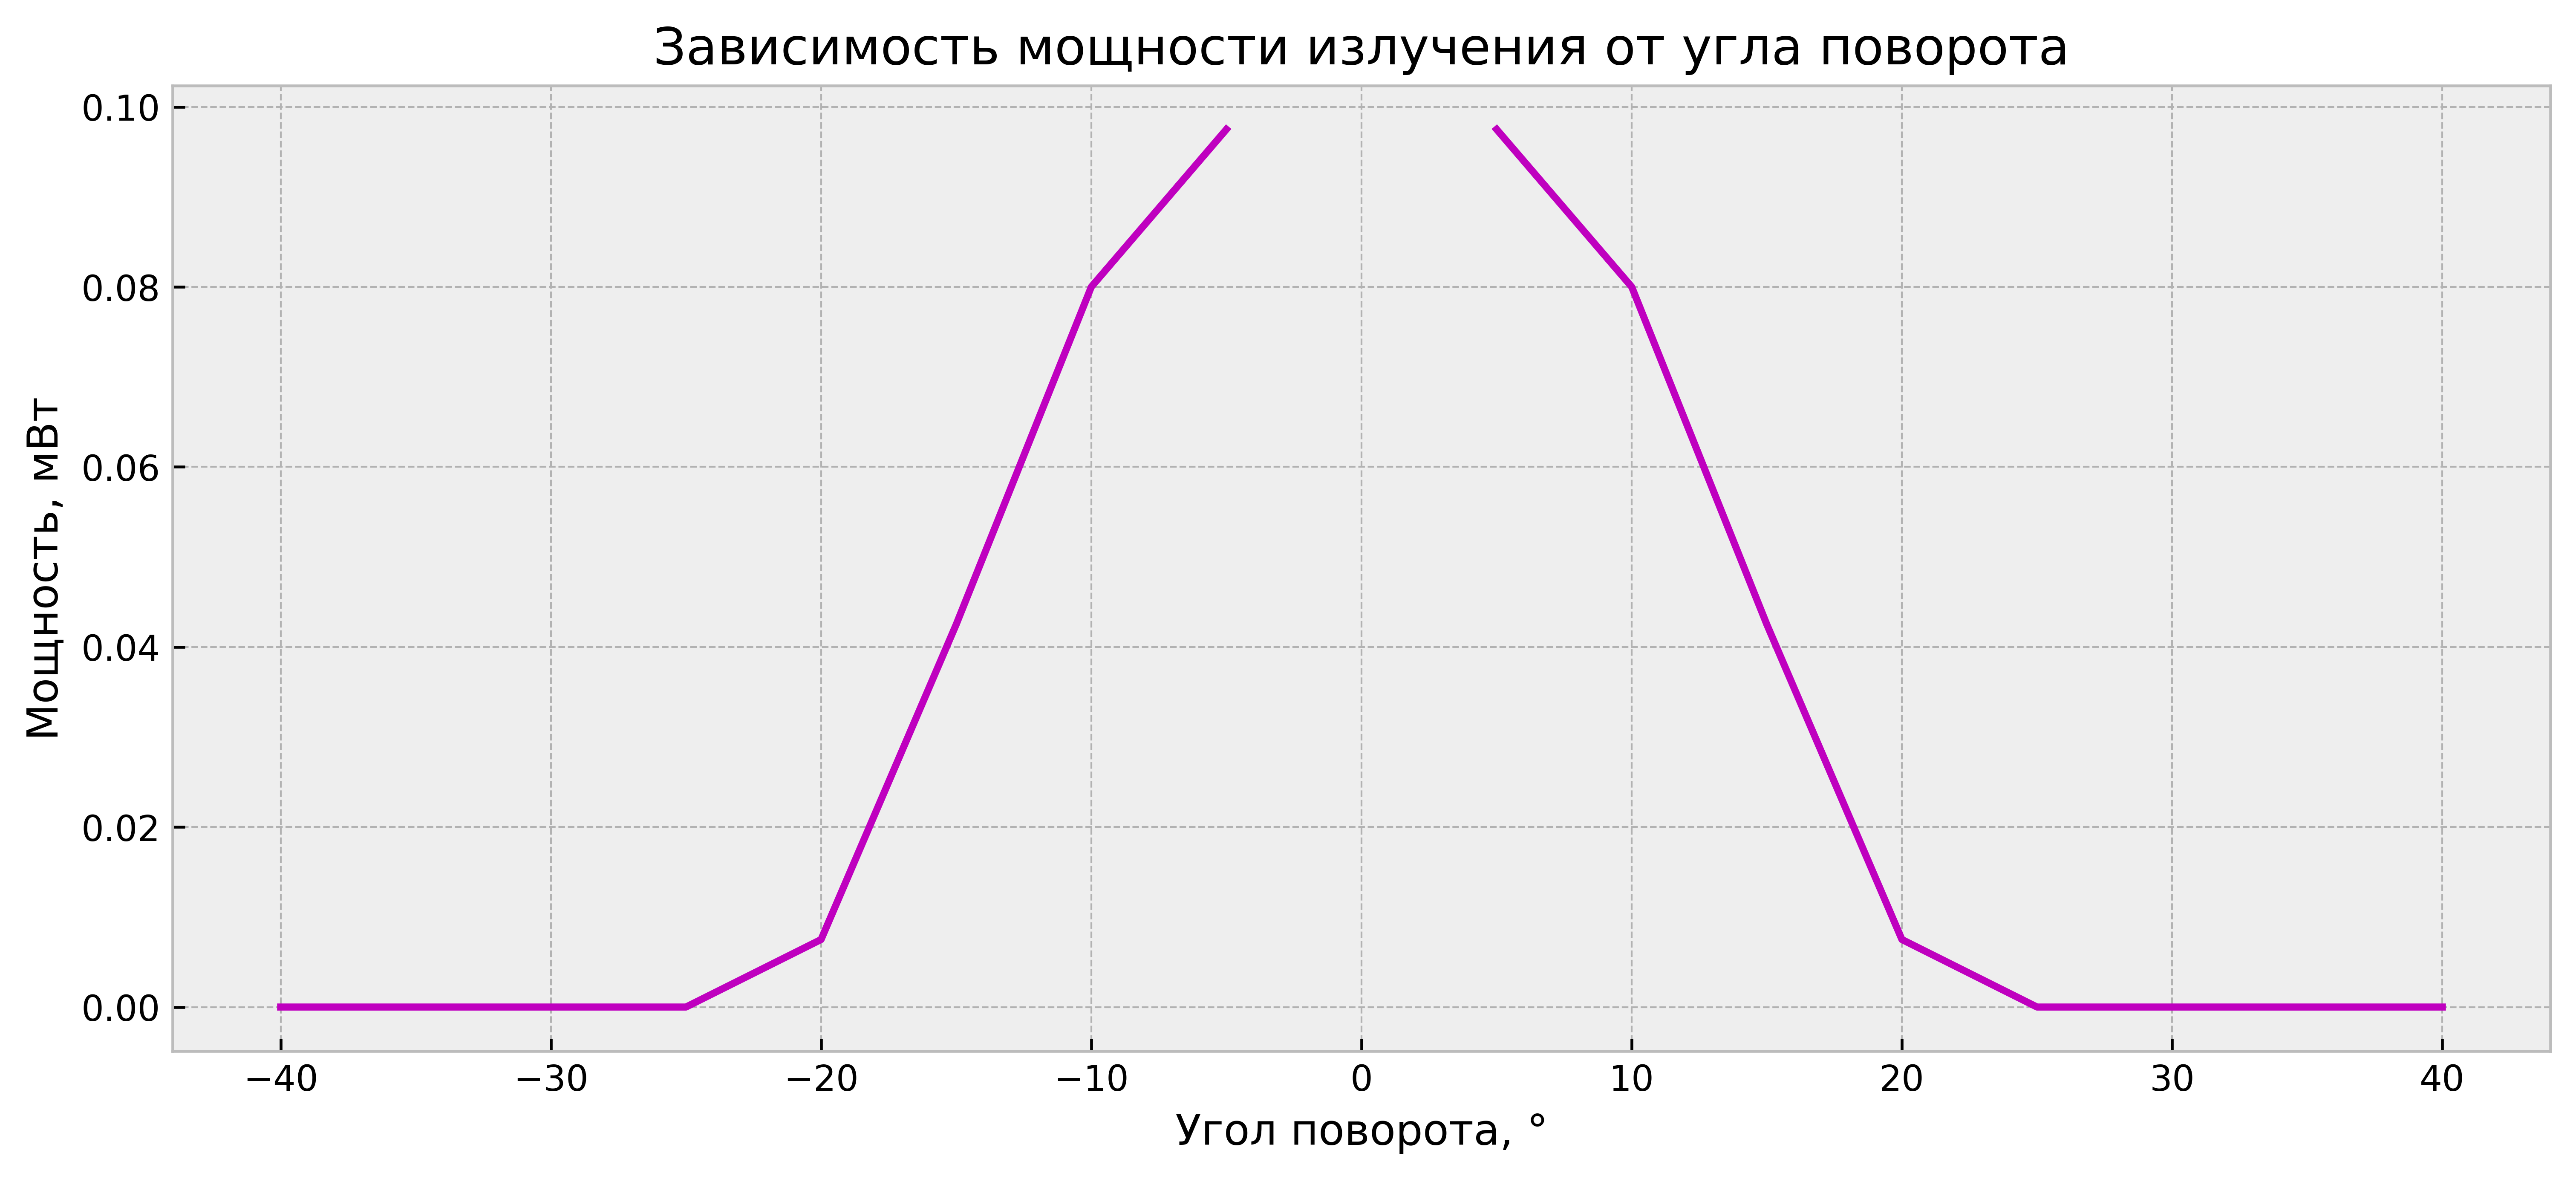

In [56]:
plt.figure(dpi=dpi, figsize=figsize)
x = -df2['angle'][::-1]
y = df2['P'][::-1]
x1 = df2['angle']
y1 = df2['P']
plt.plot(x, y, label='Мощность излучения', c='m')
plt.plot(x1, y1, label='Мощность излучения', c='m')
# plt.xticks([x, x1], rotation='vertical', fontsize=8)
plt.xlabel('Угол поворота, °')
plt.ylabel('Мощность, мВт')
plt.title('Зависимость мощности излучения от угла поворота')
plt.show()

### Без нуля (соед)

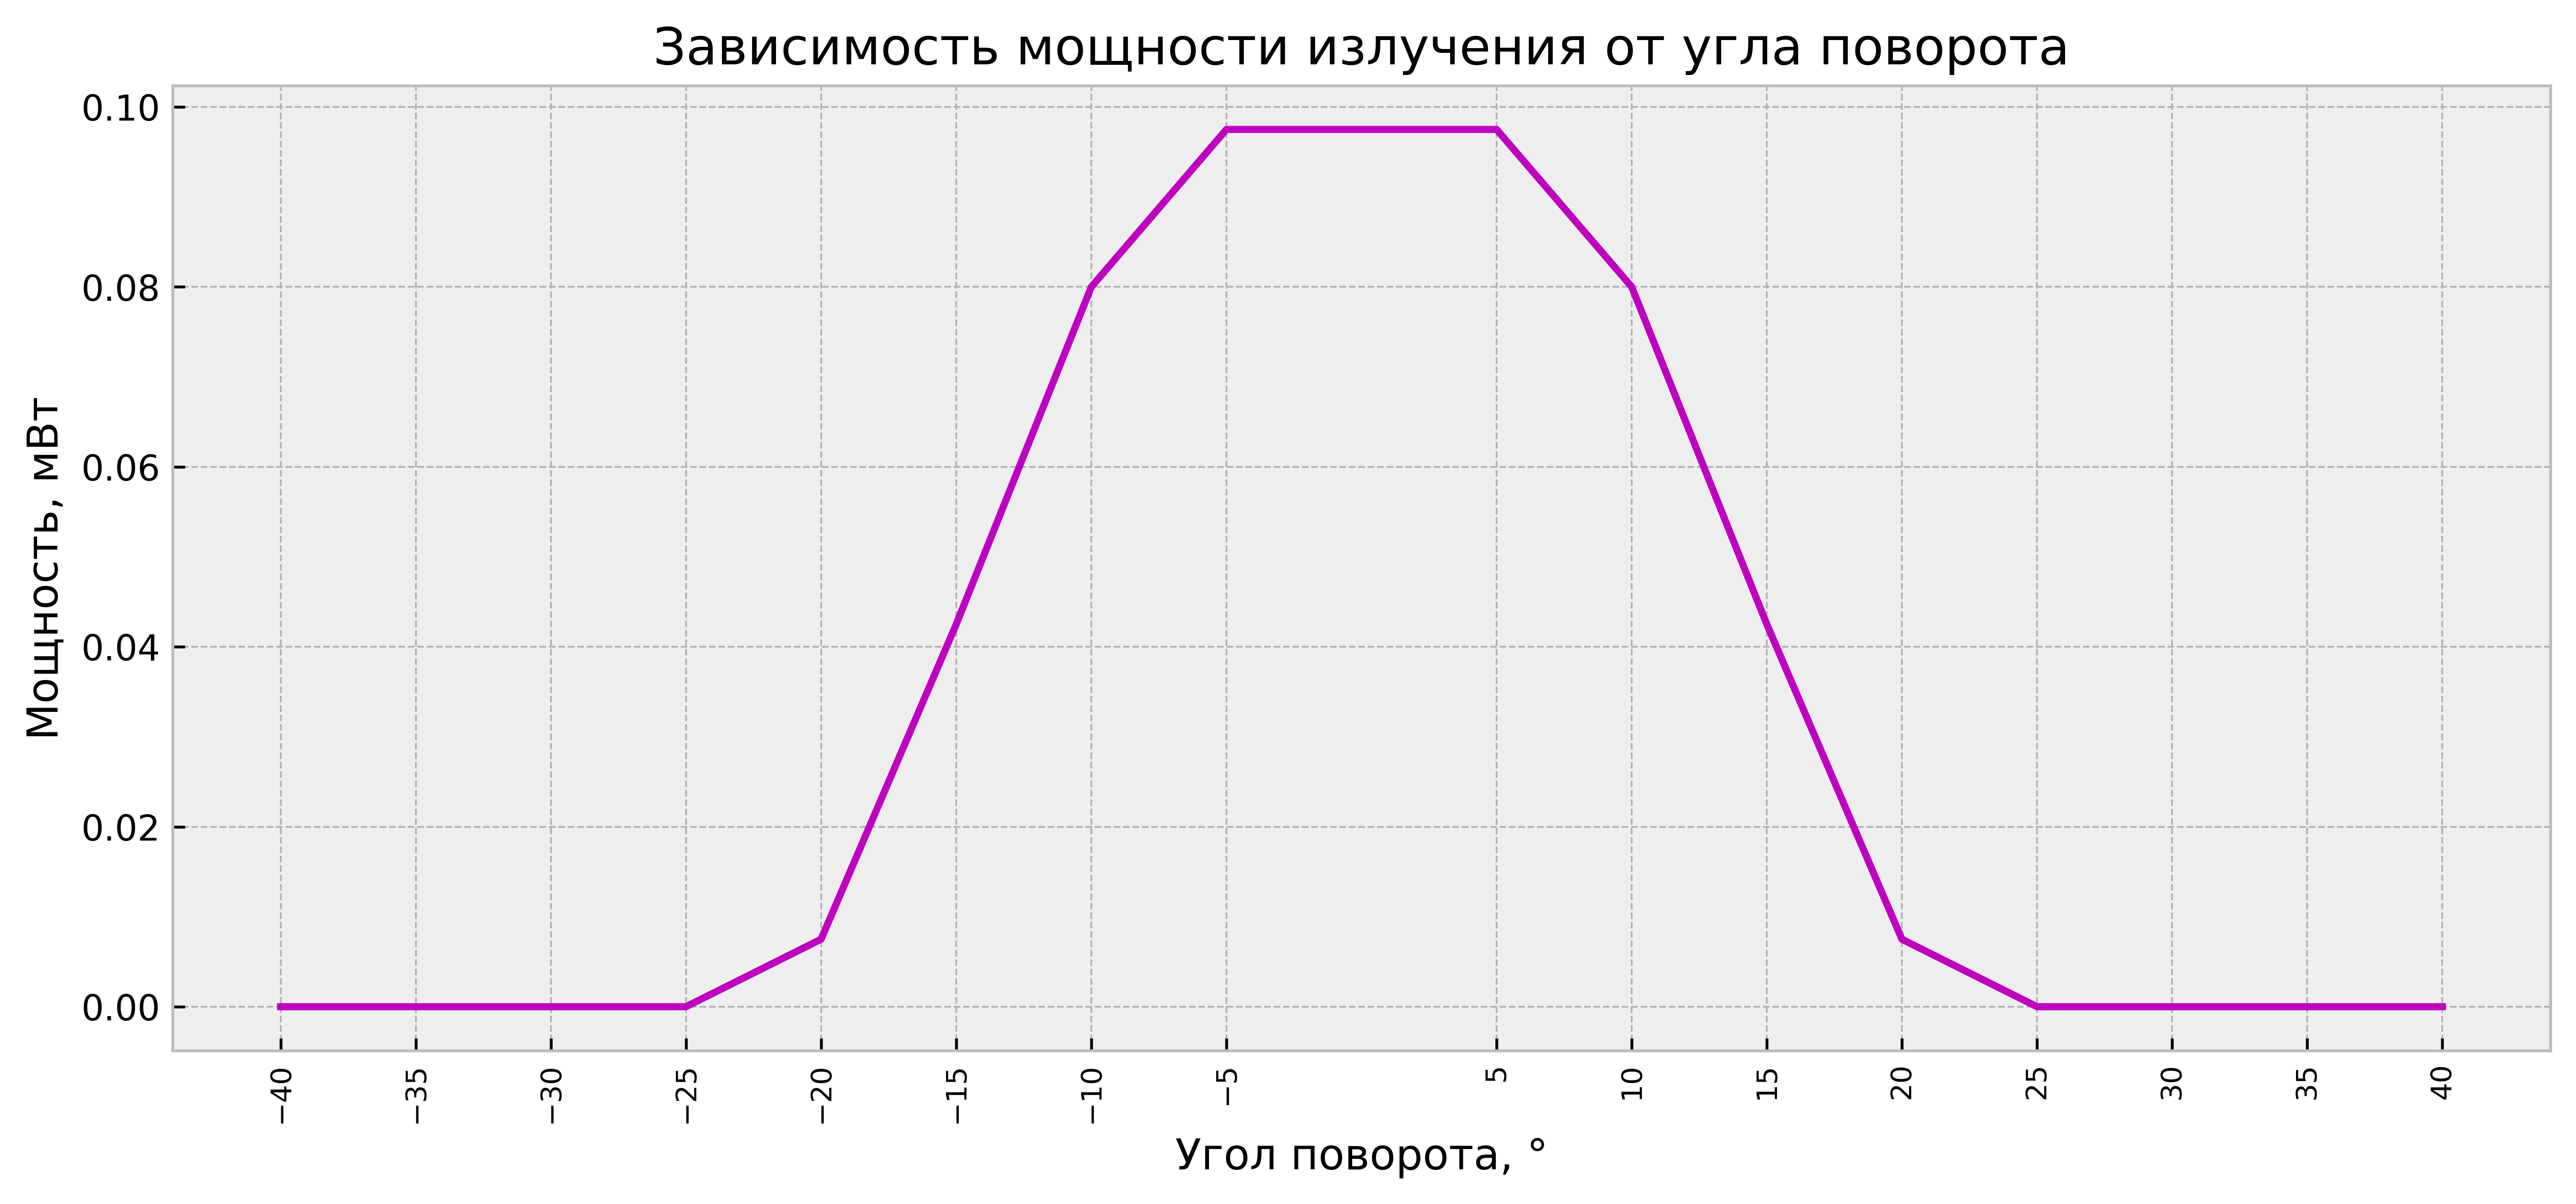

In [58]:
plt.figure(dpi=dpi, figsize=figsize)
x = pd.concat([-df2['angle'][::-1], df2['angle']], axis=0)
y = pd.concat([df2['P'][::-1], df2['P']], axis=0)
plt.plot(x, y, label='Мощность излучения', c='m')
plt.xticks(x, rotation='vertical', fontsize=8)
plt.xlabel('Угол поворота, °')
plt.ylabel('Мощность, мВт')
plt.title('Зависимость мощности излучения от угла поворота')
plt.show()

### С нулем (фикт значение (0, 0.1))

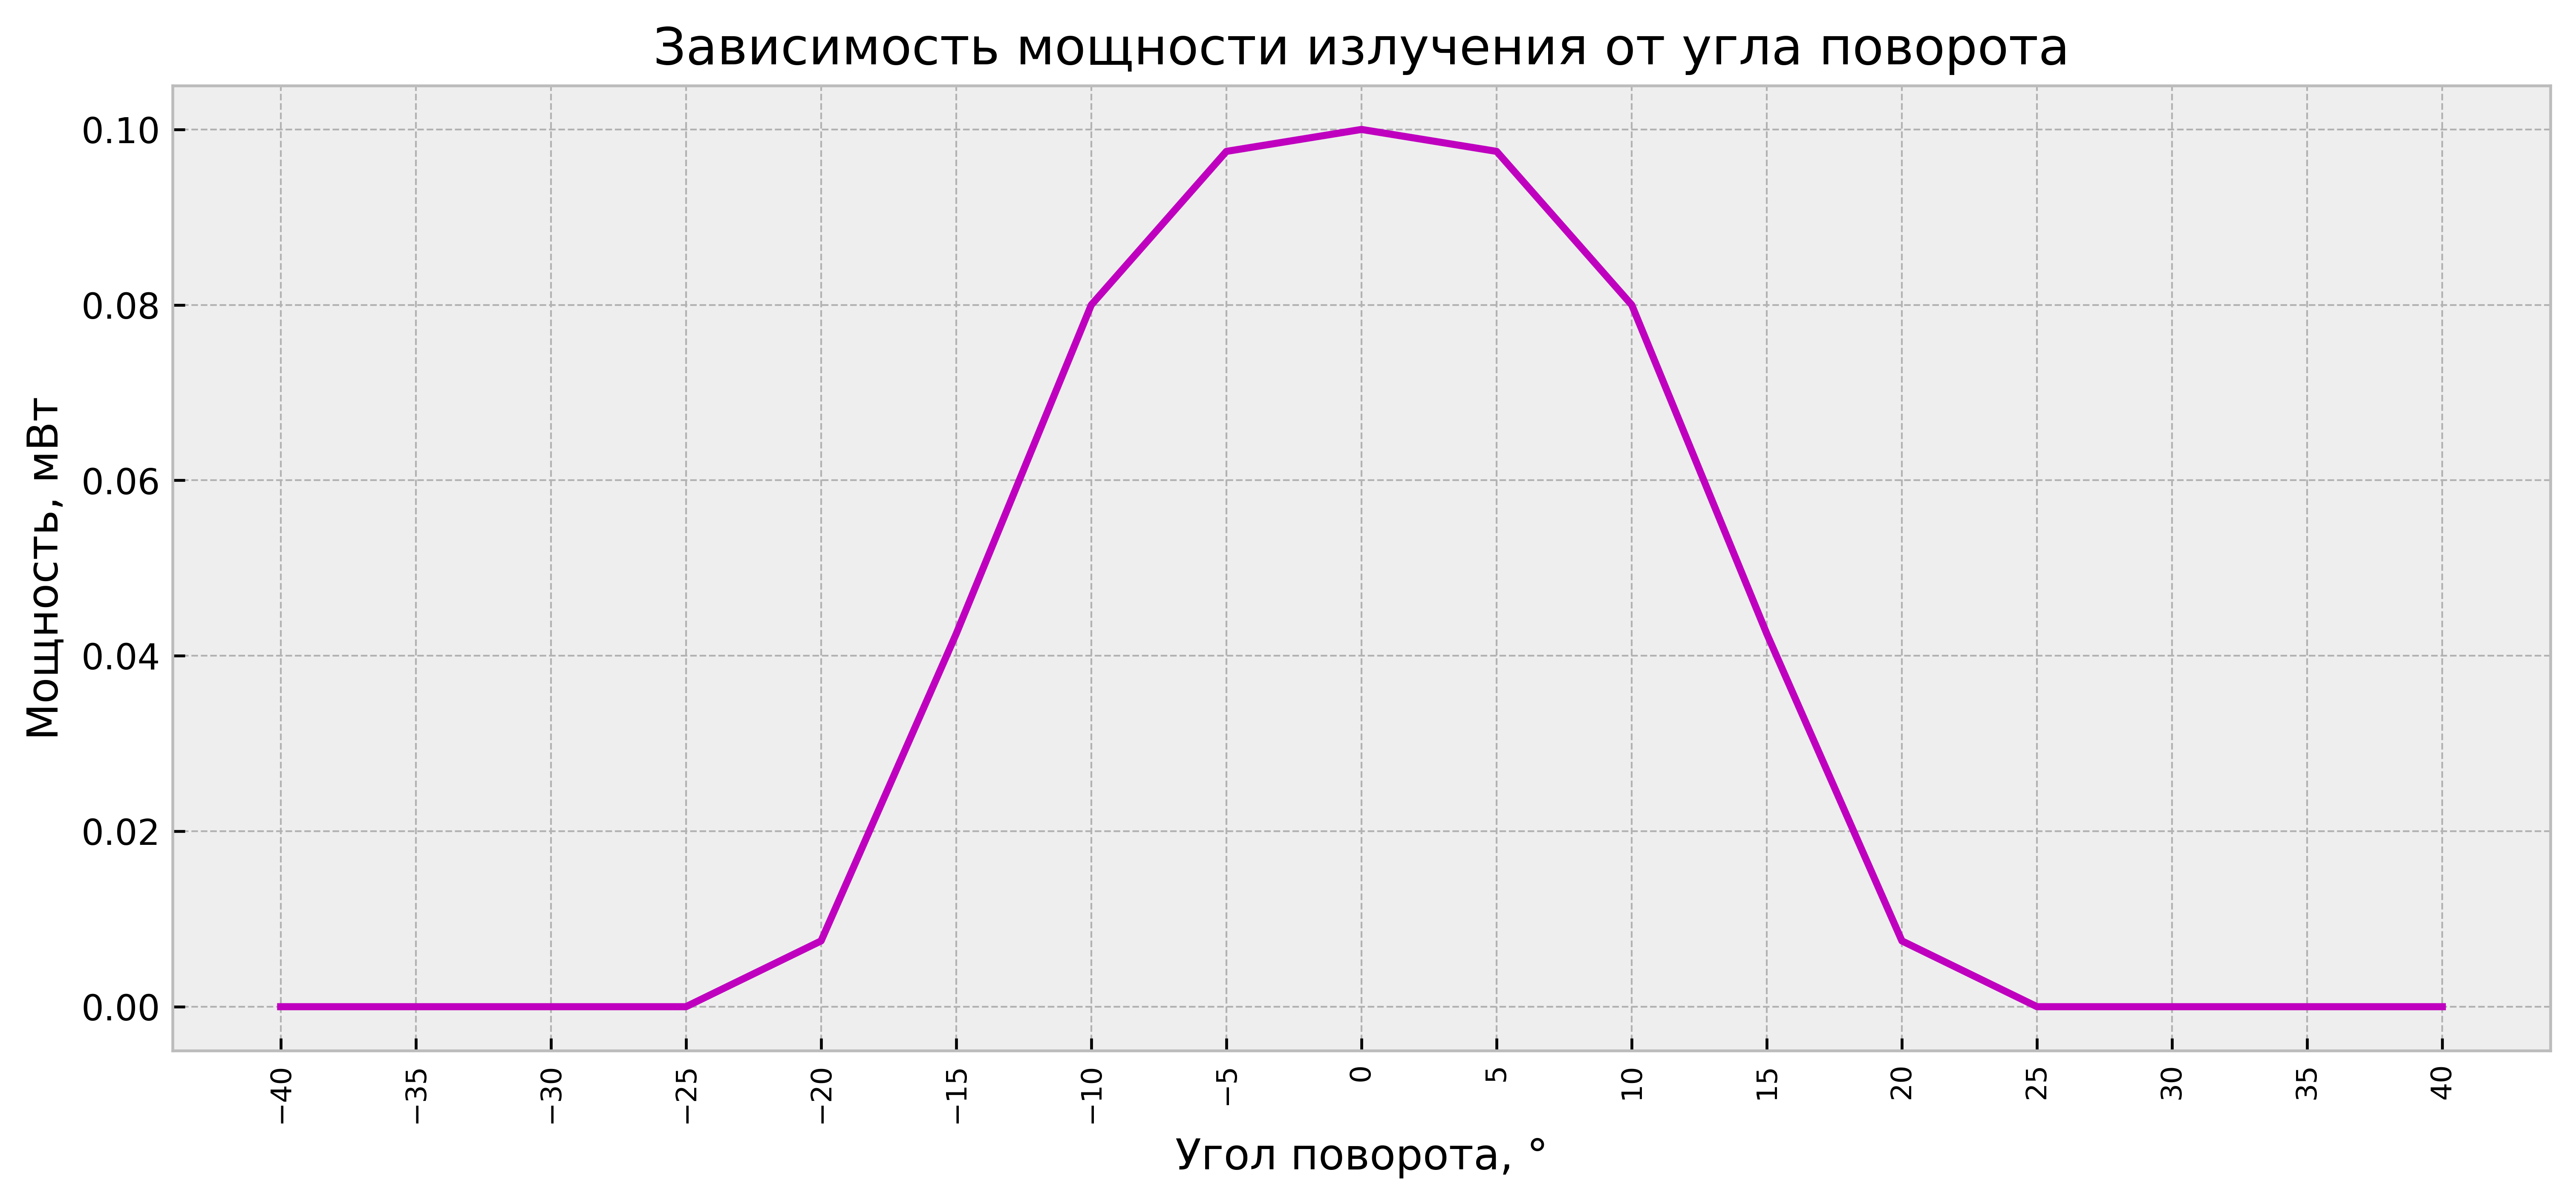

In [60]:
plt.figure(dpi=dpi, figsize=figsize)
x = [-40,-35,-30,-25,-20,-15,-10,-5,0,5,10,15,20,25,30,35,40]
y = [0,0,0,0,0.0075,0.0425,0.08,0.0975,0.1,0.0975,0.08,0.0425,0.0075,0,0,0,0]
plt.plot(x, y, label='Мощность излучения', c='m')
plt.xticks(x, rotation='vertical', fontsize=8)
plt.xlabel('Угол поворота, °')
plt.ylabel('Мощность, мВт')
plt.title('Зависимость мощности излучения от угла поворота')
plt.show()

### ноль

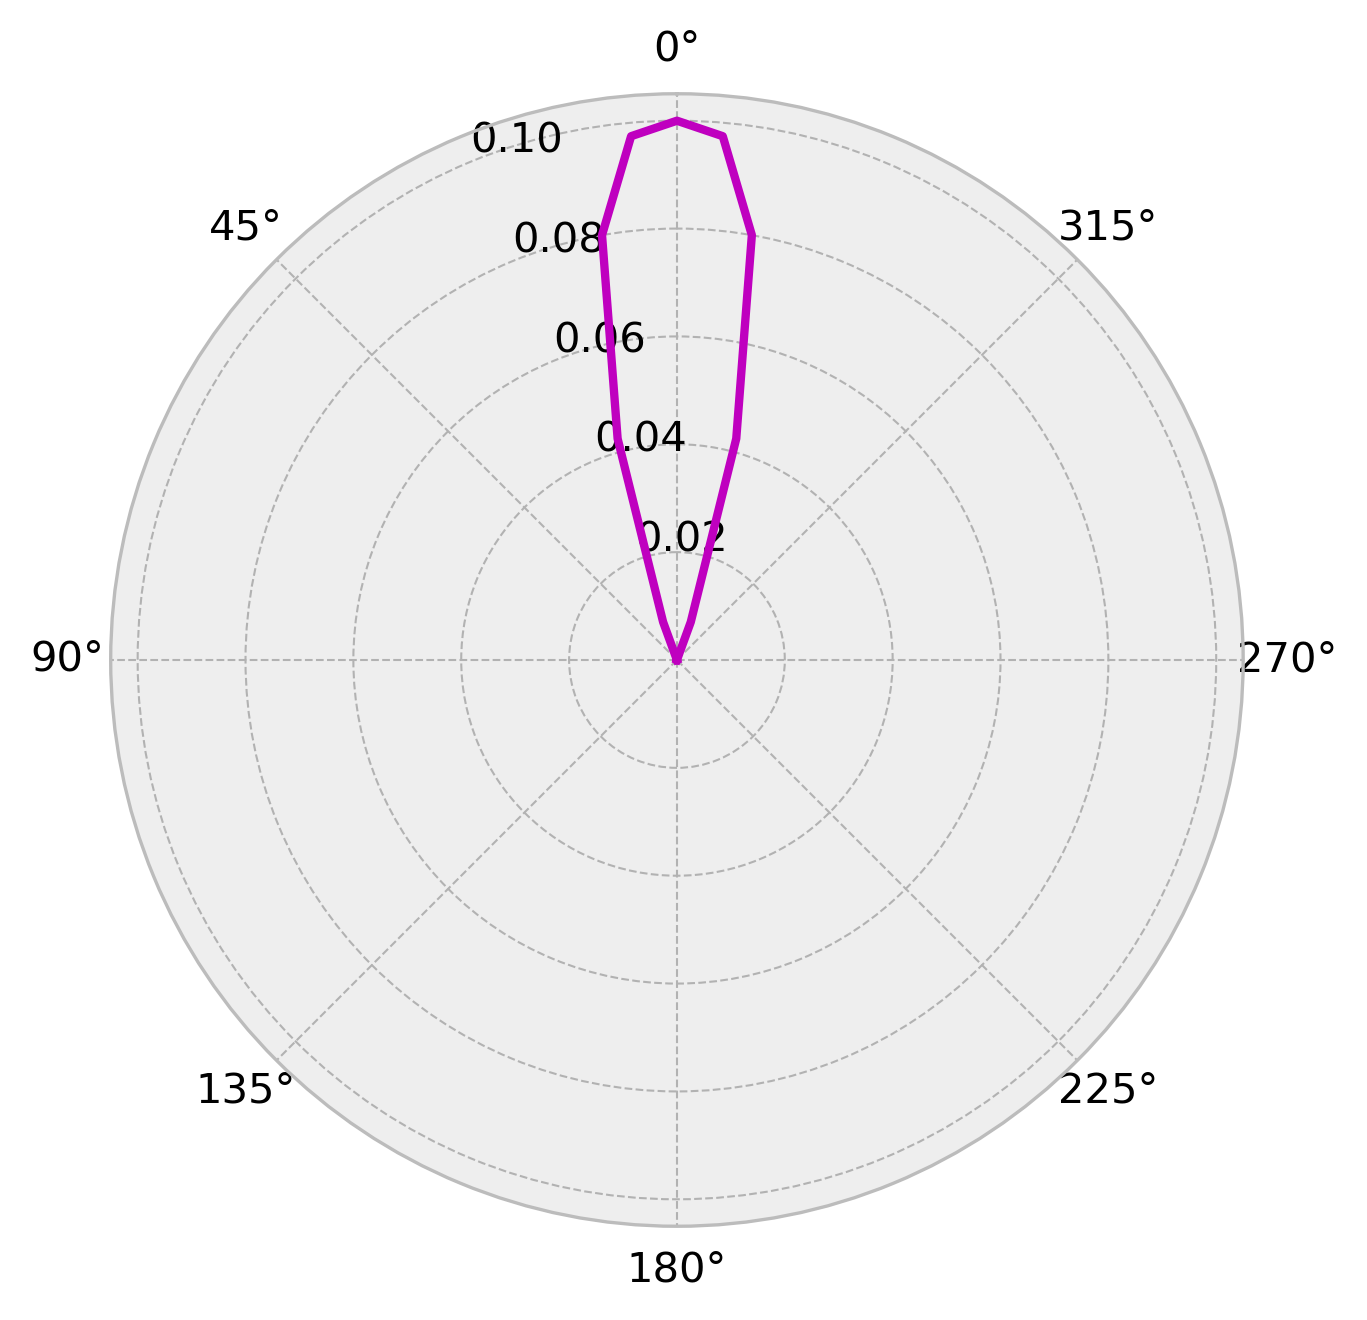

In [61]:
fig = plt.figure(dpi=300, figsize=(5,5))
ax = fig.add_subplot(111, polar=True)
ax.set_aspect(1.0)
ax.set_theta_zero_location("N")
plt.polar(np.deg2rad(x), y, 'm')
plt.show()

### без нуля

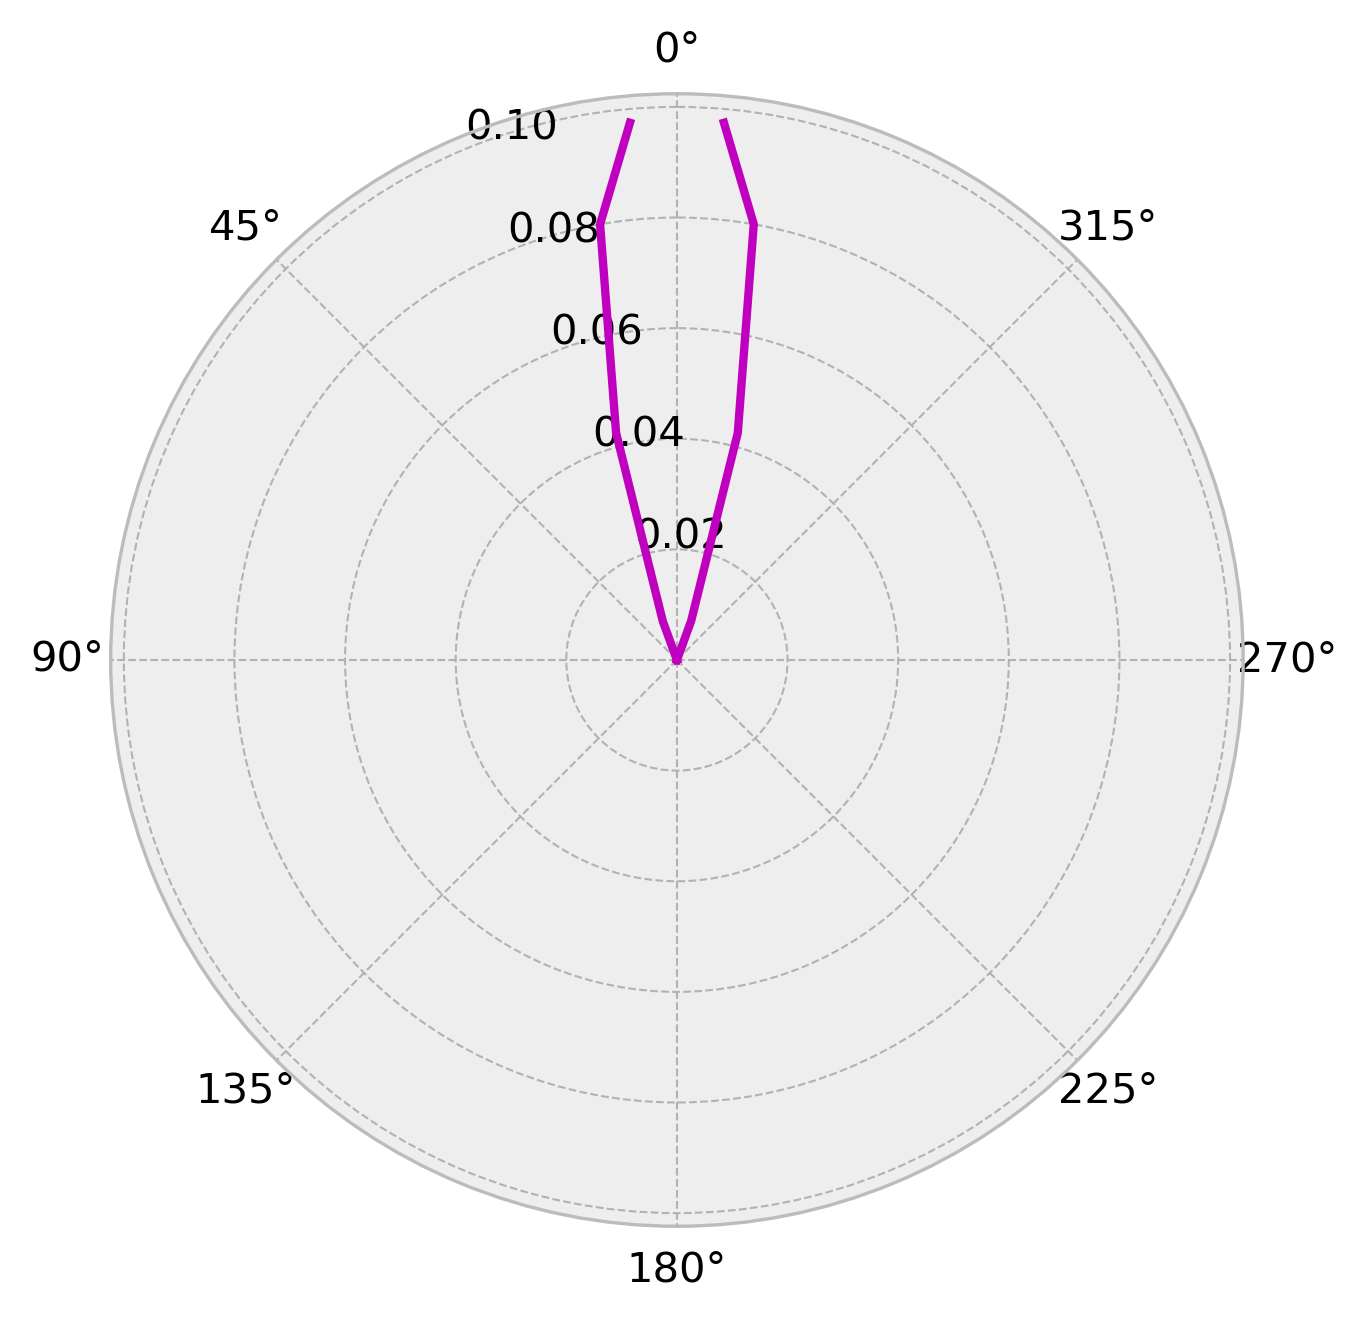

In [57]:
fig = plt.figure(dpi=300, figsize=(5,5))
ax = fig.add_subplot(111, polar=True)
ax.set_aspect(1.0)
ax.set_theta_zero_location("N")
plt.polar(np.deg2rad(x), y, 'm')
plt.polar(np.deg2rad(x1), y1, 'm')
plt.show()